In [73]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [74]:
data = pd.read_csv('drive/MyDrive/EnemyData/enemy_training_data.csv')

In [75]:
data.head()

,dist_x,dist_y,playerVel,enemyVel
0,-18.896393,-200.0,0.000000,0.557526
1,0.153244,-200.0,0.000000,0.658462
2,0.152924,-200.0,0.000000,0.658096
3,1.378845,-200.0,-1.921112,-1.501373
4,13.635193,-200.0,-1.964844,-1.551285


In [76]:
data = torch.tensor(data.values, dtype=torch.float32)

In [77]:
X_train = data[:,:3]
Y_train = data[:, 3]

In [78]:
X_mean = X_train.mean()
Y_mean = Y_train.mean()
X_std = X_train.std()
Y_std = Y_train.std()

In [80]:
X_train = (X_train - X_mean) / X_std
Y_train = (Y_train - Y_mean) / Y_std

In [82]:
lr = 0.01

In [83]:
def makeParam(*shape):
  return torch.normal(0.1, 0.3, shape, requires_grad=True)

In [96]:
hidden = 20

w1 = makeParam(3, hidden)
b1 = makeParam(hidden)
w2 = makeParam(hidden, 1)
b2 = makeParam(1)

In [85]:
def model(x):
  l1 = x@w1+b1
  l1 = torch.relu(l1)
  l2 = l1@w2+b2
  return l2

In [86]:
def loss(y_pred, y):
  return ((y-y_pred)**2).mean()

In [87]:
def update():
  global w1, w2, b1, b2

  with torch.no_grad():
    w1 -= w1.grad*lr
    w2 -= w2.grad*lr
    b1 -= b1.grad*lr
    b2 -= b2.grad*lr

  w1.grad.zero_()
  w2.grad.zero_()
  b1.grad.zero_()
  b2.grad.zero_()

In [95]:
losses = []

In [97]:

for i in range(500):
  pred = model(X_train)

  l = loss(pred, Y_train)
  l.backward()

  update()
  losses.append(l.item())

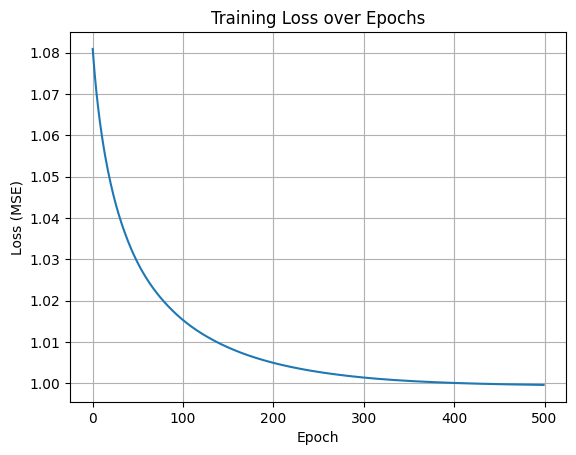

In [98]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()


In [99]:
np.savetxt('w1.csv', w1.detach(), delimiter=',')
np.savetxt('b1.csv', b1.detach(), delimiter=',')
np.savetxt('w2.csv', w2.detach(), delimiter=',')
np.savetxt('b2.csv', b2.detach(), delimiter=',')

np.savetxt('X_mean.csv', X_mean.unsqueeze(0), delimiter=',')
np.savetxt('X_std.csv', X_std.unsqueeze(0), delimiter=',')
np.savetxt('Y_mean.csv', Y_mean.unsqueeze(0), delimiter=',')
np.savetxt('Y_std.csv', Y_std.unsqueeze(0), delimiter=',')